In [2]:
x = zeros(4,4);
k = zeros(4,4);

Reading in data ...
Predicting intermediate values ...
Predicting the instantaneous power consumption ...
Generating the correlation traces ...



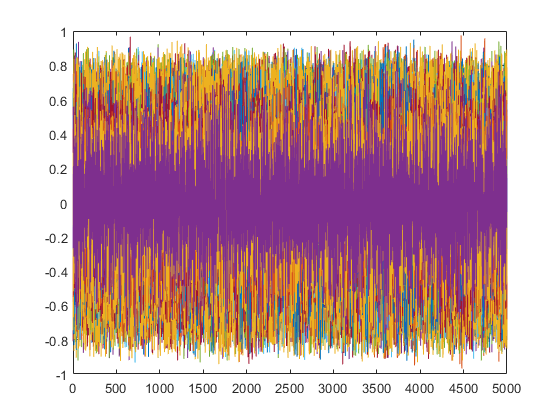

In [5]:
load('WS1.mat')

n_traces = 10;

inputs = inputs(1:n_traces);

traces = traces(1:n_traces,:);


% load data

disp('Reading in data ...');

%load('-mat',workspace);

b=1;

inputs=inputs(:,b);

% predict the SubBytes output: SubBytes(XOR(key,data))

disp('Predicting intermediate values ...');

[m,n] = size(traces);

key = [0:255];

after_sbox = zeros(m,256);

for i=1:m

after_sbox(i,:) = SubBytes(bitxor(inputs(i),key)+1);

end

key_trace = zeros(256,n);



disp('Predicting the instantaneous power consumption ...');

power_consumption = byte_Hamming_weight(after_sbox+1);

% correlate the predicted power consumption with the real power consumption

disp('Generating the correlation traces ...');

chunksize=50;

chunks=n/50;

for i=1:256

for j=1:chunks

cmatrix= corrcoef([traces(:,1+(j-1)*chunksize:j*chunksize) power_consumption(:,i)]);

key_trace(i,1+(j-1)*chunksize:j*chunksize) =cmatrix(chunksize+1,1:chunksize);

end

end

% end

plot(key_trace')

Reading in data ...
Predicting intermediate values ...
Predicting the instantaneous power consumption ...
Generating the correlation traces ...



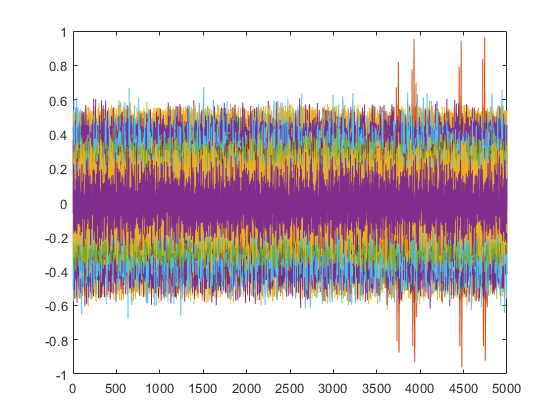

In [14]:
load('WS1.mat')

n_traces = 50;

inputs = inputs(1:n_traces);

traces = traces(1:n_traces,:);


disp('Reading in data ...');

%load('-mat',workspace);

b=1;

inputs=inputs(:,b);

% predict the SubBytes output: SubBytes(XOR(key,data))

disp('Predicting intermediate values ...');

[m,n] = size(traces);

key = [0:255];

after_sbox = zeros(m,256);

for i=1:m

after_sbox(i,:) = SubBytes(bitxor(inputs(i),key)+1);

end

key_trace = zeros(256,n);


% predict the power consumption

disp('Predicting the instantaneous power consumption ...');

power_consumption = byte_Hamming_weight(after_sbox+1);

% correlate the predicted power consumption with the real power consumption

disp('Generating the correlation traces ...');

chunksize=50;

chunks=n/50;

for i=1:256

for j=1:chunks

cmatrix= corrcoef([traces(:,1+(j-1)*chunksize:j*chunksize) power_consumption(:,i)]);

key_trace(i,1+(j-1)*chunksize:j*chunksize) =cmatrix(chunksize+1,1:chunksize);

end

end

% end

plot(key_trace')

Reading in data ...
Predicting intermediate values ...
Predicting the instantaneous power consumption ...
Generating the correlation traces ...



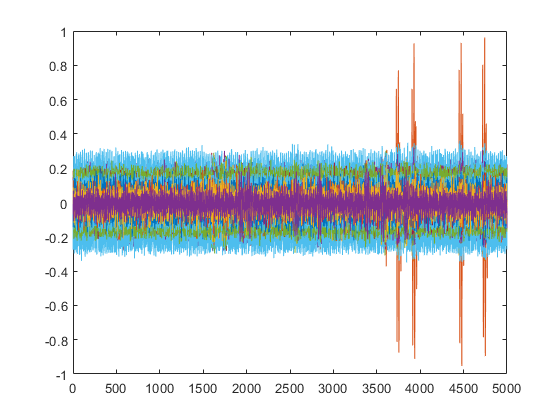

In [15]:
load('WS1.mat')

n_traces = 200;

inputs = inputs(1:n_traces);

traces = traces(1:n_traces,:);


% load data

disp('Reading in data ...');

%load('-mat',workspace);

b=1;

inputs=inputs(:,b);

disp('Predicting intermediate values ...');

[m,n] = size(traces);

key = [0:255];

after_sbox = zeros(m,256);

for i=1:m

after_sbox(i,:) = SubBytes(bitxor(inputs(i),key)+1);

end

key_trace = zeros(256,n);



% predict the power consumption

disp('Predicting the instantaneous power consumption ...');

power_consumption = byte_Hamming_weight(after_sbox+1);

% correlate the predicted power consumption with the real power

% consumption

disp('Generating the correlation traces ...');

chunksize=50;

chunks=n/50;

for i=1:256

for j=1:chunks

cmatrix= corrcoef([traces(:,1+(j-1)*chunksize:j*chunksize) power_consumption(:,i)]);

key_trace(i,1+(j-1)*chunksize:j*chunksize) =cmatrix(chunksize+1,1:chunksize);

end

end

% end

plot(key_trace')

In [16]:
[r,c] = find(key_trace==max(max(key_trace)))


r =

    44


c =

        4743




In [17]:
key_trace(r,c)%ans


ans =

    0.9618


